# Analyse des tables autres que *mutation_brute*

In [30]:
import geopandas as gpd
import pandas as pd

In [1]:
dossier_donnees = "C:/Users/khale/OneDrive/Documents/Ensae/Python pour le data scientist/Projet/Immo/Données/r32/"

In [32]:
mutation_brute = pd.read_csv(dossier_donnees + "r32_mutation.csv")

#### Table *disposition_parcelle_geompar*

La table *disposition_parcelle_geompar.shp* contient pour chaque disposition une parcelle. Dans cette table, il y a 916 276 dispositions. Il s'agit du fichier *shp* contenant le contour de chaque parcelle. Il semblerait que la variable *idmutation* permet de faire la jointure avec la table **mutation**.

In [4]:
disp_parcelle = gpd.read_file(dossier_donnees + "r32_disposition_parcelle_geompar.shp")

,IDMUTATION,geometry
0,161637,"POLYGON ((712070.977 6943434.860, 712203.626 6..."
1,121549,"POLYGON ((712184.048 6943583.089, 712201.630 6..."
2,161637,"POLYGON ((712113.937 6943514.893, 712071.261 6..."
3,161637,"POLYGON ((712239.149 6943667.133, 712290.422 6..."
4,161637,"POLYGON ((712184.048 6943583.089, 712149.518 6..."


(916276, 2)


<Projected CRS: EPSG:2154>
Name: RGF93 / Lambert-93
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: France
- bounds: (-9.86, 41.15, 10.38, 51.56)
Coordinate Operation:
- name: Lambert-93
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

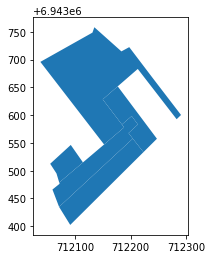

In [21]:
display(disp_parcelle.head())
disp_parcelle.head().plot()
print(disp_parcelle.shape)
disp_parcelle.crs #Récupération d'information sur le système de projection

Les polygones mises à notre dispositions sont dans le référentiel de projection LAMBERT 93. Les cartes qu'on retrouve usuellement sur le net et se basant sur la lattitude et la longitude est dans le référentiel WGS84. Il est recommandé de passer dans ce référentiel pour pouvoir superposer des cartes (mais aussi récupérer la longitude et la lattitude du centre d'une parcelle par exemple).

In [9]:
disp_parcelle_wgs84 = disp_parcelle.to_crs({'init' :'epsg:4326'}) #epsg:4326 correspond à WGS84

C:\Users\khale\anaconda3\envs\projet_2A\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

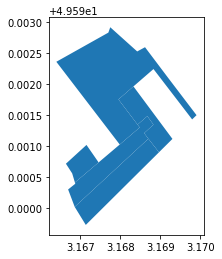

In [19]:
disp_parcelle_wgs84.head().plot()

Nombre de lignes correspondant à des IDMUTATION différents : 

In [20]:
len(disp_parcelle_wgs84["IDMUTATION"].drop_duplicates())

566129

Affichage en ajoutant la carte de la région en fond

##### Tentative de jointure avec la table mutation

In [82]:
mutation_brute["idmutation"].isin(disp_parcelle_wgs84["idmutation"].drop_duplicates()).value_counts()

True     566129
False      3463
Name: idmutation, dtype: int64

On devrait ne pas pouvoir match que 3463 mutations.

In [39]:
disp_parcelle_wgs84 = disp_parcelle_wgs84.rename(columns = {"IDMUTATION" : "idmutation"})

In [77]:
len(disp_parcelle_wgs84[disp_parcelle_wgs84["geometry"] == None]

0

In [54]:
print(len(mutation_brute))
print(len(disp_parcelle_wgs84))

569592
916276


In [79]:
disp_parcelle_wgs84_uniq = disp_parcelle_wgs84.drop_duplicates(subset = "idmutation", keep = "first")

In [92]:
fusion_mut_disp_unique = mutation_brute.merge(disp_parcelle_wgs84_uniq, on = "idmutation", how = "inner")
len(fusion_mut_disp_unique)

566129

#### Table *disposition_parcelle_geomloc*

Ce fichier contient les localisants pour chaque disposition (donc des points).

In [22]:
disp_parcelle_geomloc = gpd.read_file(dossier_donnees + "r32_disposition_parcelle_geomloc.shp")

In [23]:
len(disp_parcelle_geomloc["IDMUTATION"].drop_duplicates())

566129

In [28]:
disp_parcelle_geomloc.head()

,IDMUTATION,geometry
0,161637,POINT (712129.227 6943465.466)
1,121549,POINT (712153.889 6943531.030)
2,161637,POINT (712084.402 6943513.674)
3,161637,POINT (712125.064 6943658.035)
4,161637,POINT (712214.675 6943590.728)


#### Table *local_geomloc* : quelle est la différence entre cette table et la suivante ?

In [24]:
local_geomloc = gpd.read_file(dossier_donnees + "r32_local_geomloc.shp")

In [26]:
local_geomloc.shape

(650263, 2)

#### Table *mutation_geomlocmut*

In [11]:
mutation_geomlocmut = gpd.read_file(dossier_donnees + "r32_mutation_geomlocmut.shp")

In [25]:
mutation_geomlocmut.shape

(442992, 2)

In [17]:
display(mutation_geomlocmut.head())
print(mutation_geomlocmut.shape)
len(mutation_geomlocmut["IDMUTATION"].drop_duplicates())

,IDMUTATION,geometry
0,16615,POINT (729944.939 6883384.794)
1,43152,POINT (707194.458 6906112.211)
2,43609,POINT (743009.782 6939762.703)
3,43859,POINT (717426.922 6935429.674)
4,44900,POINT (744849.202 6940805.153)


(442992, 2)


442992

#### Table *geompar*

In [ ]:
geompar = gpd.read_file(dossier_donnees + "r32_mutation_geompar.shp")

In [ ]:
display(geompar.head())
geompar.shape

#### Table *geomparmut*

In [ ]:
geomparmut = gpd.read_file(dossier_donnees + "r32_mutation_geomparmut.shp")

In [ ]:
display(geomparmut.head())
geomparmut.shape